<a href="https://colab.research.google.com/github/Eshita781996/EVAnalaysis/blob/main/EV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

ev_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA        98122        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA        98109        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA        98027        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           291.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21791 entries, 0 to 21790
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         21791 non-null  object 
 1   County                                             21791 non-null  object 
 2   City                                               21791 non-null  object 
 3   State                                              21791 non-null  object 
 4   Postal Code                                        21791 non-null  int64  
 5   Model Year                                         21791 non-null  int64  
 6   Make                                               21791 non-null  object 
 7   Model                                              21791 non-null  object 
 8   Electric Vehicle Type                              21791 non-null  object 
 9   Clean 

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

In [5]:
ev_data = ev_data.dropna()

<ipython-input-6-e910ec472edf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


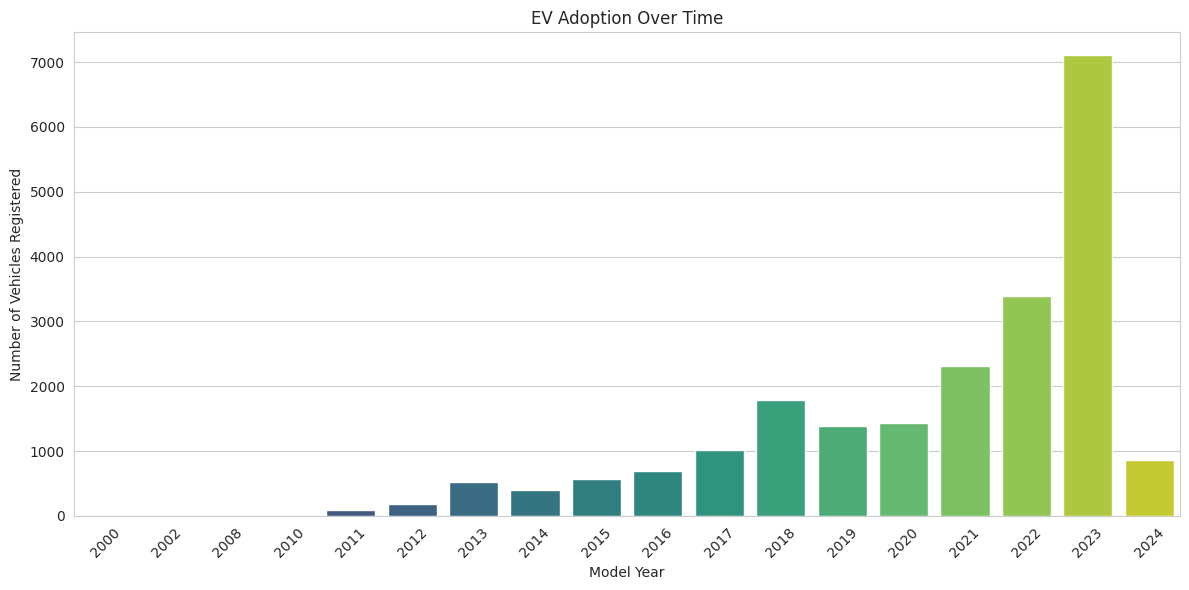

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

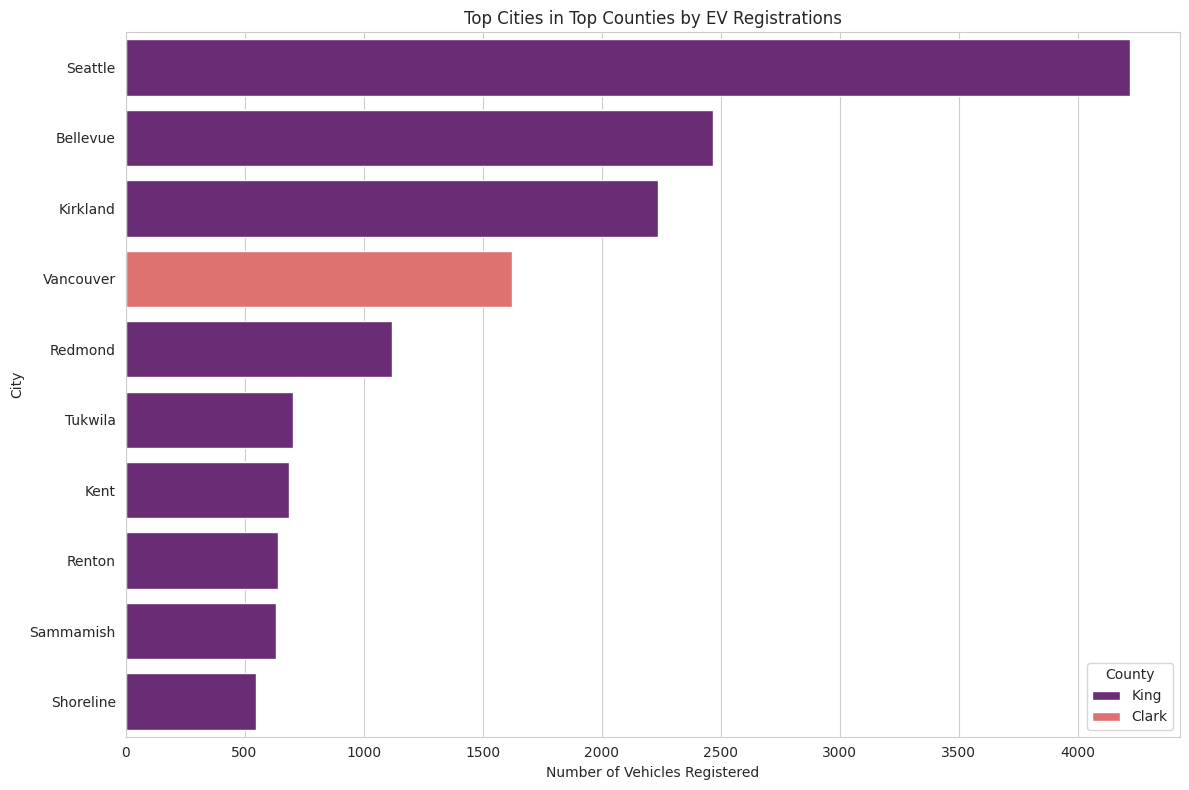

In [7]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

<ipython-input-8-8131f6cd104b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


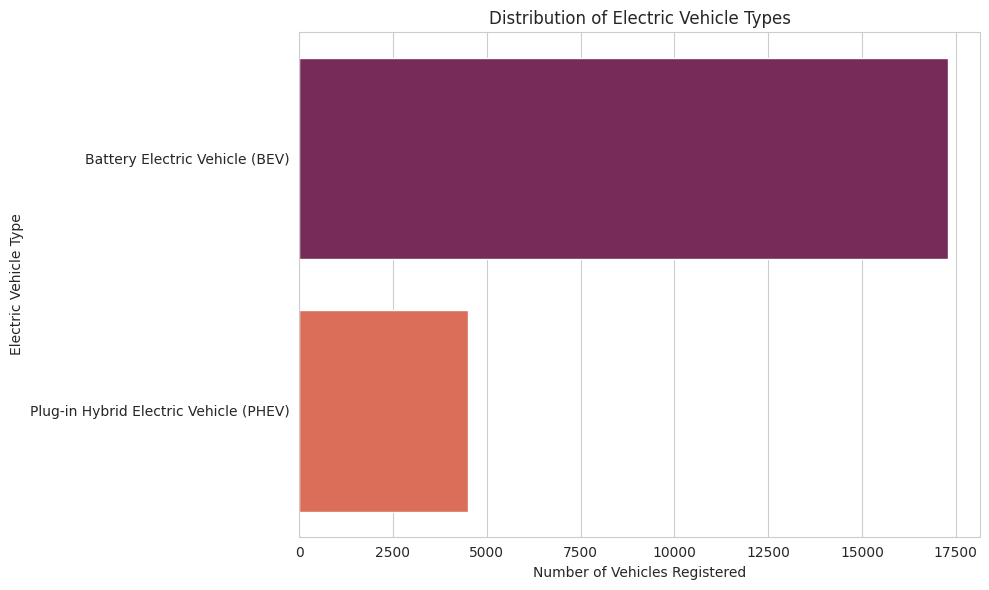

In [8]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

<ipython-input-9-b2b8e131a204>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

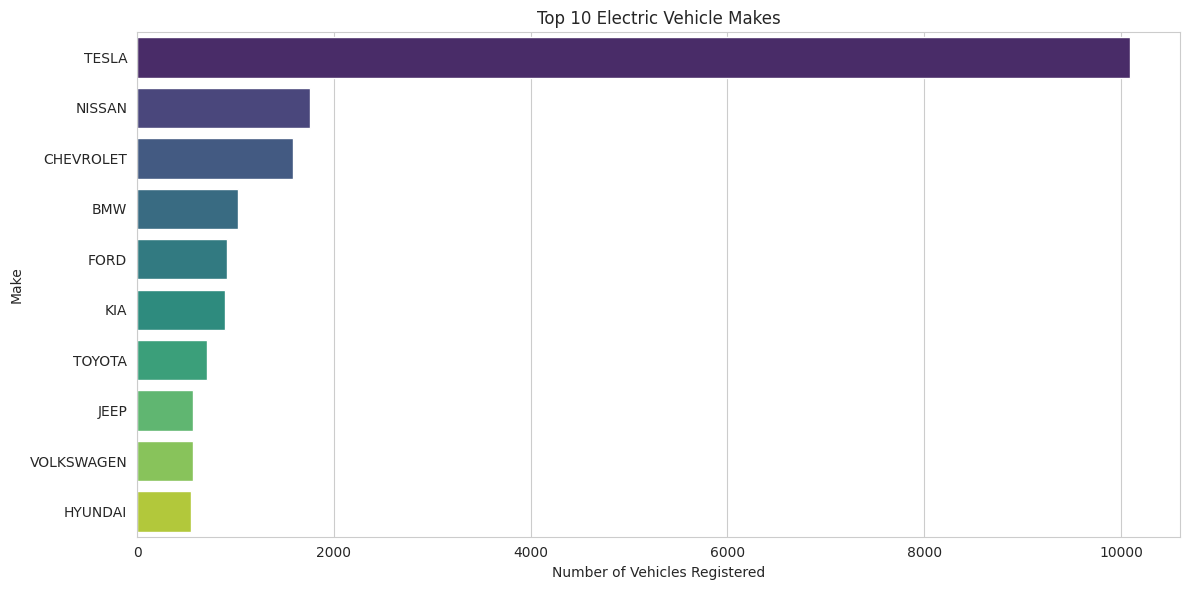

In [9]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show